# Data Mining Project

In [152]:
#setup
import numpy
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly
import plotly.plotly as py
from mpl_toolkits import mplot3d
plotly.tools.set_credentials_file(username='xavier2696', api_key='97cuXMXYTejnMxo9gpIk')
import re
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [3]:
%load_ext autoreload
%autoreload 2

In [116]:
#keys
origin_time_key = 'Origin Time'
epicenter_longitude_key = 'EpicenterLongitude'
epicenter_latitude_key = 'EpicenterLatitude'
depth_key = 'Depth'
magnitude_key = 'Magnitude'
station_code_key = 'StationCode'
station_name_key = 'StationName'
station_longitude_key = 'StationLongitude'
station_latitude_key = 'StationLatitude'
instrument_kind_key = 'InstrumentKind'
start_time_key = 'StartTime'
record_length_key = 'RecordLength'
sample_rate_key = 'SampleRate'
amplitude_unit_key = 'AmplitudeUnit'
amplitude_max_u_key = 'AmplitudeMAX. U'
amplitude_max_n_key = 'AmplitudeMAX. N'
amplitude_max_e_key = 'AmplitudeMAX. E'

earthquake_column_names_dict = {origin_time_key: 'origin_time',
                               epicenter_longitude_key: 'epicenter_longitude',
                               epicenter_latitude_key: 'epicenter_latitude',
                               depth_key: 'depth',
                               magnitude_key: 'magnitude',
                               station_code_key: 'station_code',
                               station_name_key: 'station_name',
                               station_longitude_key: 'station_longitude',
                               station_latitude_key: 'station_latitude',
                               instrument_kind_key: 'instrument_kind',
                               start_time_key: 'start_time',
                               record_length_key: 'record_length',
                               sample_rate_key: 'sample_rate',
                               amplitude_unit_key: 'amplitude_unit',
                               amplitude_max_u_key: 'amplitude_max_u',
                               amplitude_max_n_key: 'amplitude_max_n',
                               amplitude_max_e_key: 'amplitude_max_e'}

earthquake_keys = [origin_time_key, epicenter_longitude_key, epicenter_latitude_key, depth_key, magnitude_key, \
                  station_code_key, station_name_key, station_longitude_key, station_latitude_key, \
                   instrument_kind_key, start_time_key, record_length_key, sample_rate_key, amplitude_unit_key, \
                  amplitude_max_u_key, amplitude_max_n_key, amplitude_max_e_key]

In [117]:
#method for creating a dictionary with the lines of the file
def earthquake_dict(lines_array):
    earthquake = {}
    for line in earthquake_array:
        if ':' in line:
            for key in earthquake_keys:
                if key in line:
                    if '~' in line:
                        range_string = line.split(': ')[1]
                        lower = (range_string.split('~')[1]).strip()
                        upper = (range_string.split('~')[0]).strip()
                        earthquake[earthquake_column_names_dict[key] + '_lower'] = float(lower)
                        earthquake[earthquake_column_names_dict[key] + '_upper'] = float(upper)
                    else:
                        try:
                            value = float((line.split(': ')[1]).strip())
                            earthquake[earthquake_column_names_dict[key]] = value
                        except ValueError:
                            earthquake[earthquake_column_names_dict[key]] = (line.split(': ')[1]).strip()
                        
    return earthquake

In [157]:
#add data for the earthquakes
#get files for eq_cwb directory
earthquakes = []
for directory in os.listdir(os.getcwd() + '/data/earthquake/eq_cwb/2017ASCII'):
    path = os.getcwd() + '/data/earthquake/eq_cwb/2017ASCII/' + directory
    if os.path.isdir(path):
        for file in os.listdir(path):
            with open(path + '/' + file,"r") as file:
                earthquake_array = [string for string in file.read().split('\n')]
                earthquakes += [earthquake_dict(earthquake_array)]
                
#get files for eq_ncree directory
for directory in os.listdir(os.getcwd() + '/data/earthquake/eq_ncree/106'):
    path = os.getcwd() + '/data/earthquake/eq_ncree/106/' + directory
    if os.path.isdir(path):
        for file in os.listdir(path):
            with open(path + '/' + file, encoding='windows-1254') as file:
                earthquake_array = [string for string in file.read().split('\n')]
                earthquakes += [earthquake_dict(earthquake_array)]

earthquake_df = pd.DataFrame.from_dict(earthquakes)
print('Length:', len(earthquake_df))

Length: 2338


In [161]:
print('Length unique earthquakes:', len(earthquake_df.start_time.unique()))

Length unique earthquakes: 575


In [6]:
earthquake_df[0:10]

,amplitude_max_e_lower,amplitude_max_e_upper,amplitude_max_n_lower,amplitude_max_n_upper,amplitude_max_u_lower,amplitude_max_u_upper,amplitude_unit,depth,epicenter_latitude,epicenter_longitude,instrument_kind,magnitude,origin_time,record_length,sample_rate,start_time,station_code,station_latitude,station_longitude,station_name
0,-5.802,6.759,-5.264,5.862,-5.623,4.187,gal. DCoffset(corr),11.6,23.03,121.45,FBA,3.4,2017/01/08-03:52:23,180.0,50.0,2017/01/08-03:51:12.000,ECS,23.095,121.219,Chishang
1,-4.965,5.802,-8.733,12.741,-6.101,3.709,gal. DCoffset(corr),11.6,23.03,121.45,FBA,3.4,2017/01/08-03:52:23,180.0,50.0,2017/01/08-03:51:12.000,EDH,22.972,121.305,Donghe
2,-20.876,20.038,-18.902,12.143,-4.606,2.931,gal. DCoffset(corr),11.6,23.03,121.45,FBA,3.4,2017/01/08-03:52:23,180.0,50.0,2017/01/08-03:51:12.000,CHK,23.098,121.373,Chenggong
3,-1.735,1.256,-2.094,2.273,-2.452,2.632,gal. DCoffset(corr),16.2,22.87,120.14,FBA,5.7,2017/02/11-01:12:52,180.0,50.0,2017/02/11-01:12:10.000,WNT1,23.907,120.680,Nantou City
4,-1.316,1.196,-1.495,1.436,-0.598,0.538,gal. DCoffset(corr),16.2,22.87,120.14,FBA,5.7,2017/02/11-01:12:52,180.0,50.0,2017/02/11-01:12:10.000,TCU,24.146,120.684,Taichung City
5,-4.845,4.965,-4.546,3.768,-2.991,2.871,gal. DCoffset(corr),16.2,22.87,120.14,FBA,5.7,2017/02/11-01:12:52,180.0,50.0,2017/02/11-01:12:10.000,SGS,23.080,120.591,Jiaxian
6,-1.316,1.196,-1.675,1.555,-0.479,0.479,gal. DCoffset(corr),16.2,22.87,120.14,FBA,5.7,2017/02/11-01:12:52,180.0,50.0,2017/02/11-01:12:10.000,WYP,24.333,120.653,Waipu
7,-9.331,8.135,-10.109,8.733,-3.051,2.632,gal. DCoffset(corr),16.2,22.87,120.14,FBA,5.7,2017/02/11-01:12:52,180.0,50.0,2017/02/11-01:12:10.000,WGK,23.685,120.570,Gukeng
8,-1.974,2.034,-2.333,2.213,-1.196,1.376,gal. DCoffset(corr),16.2,22.87,120.14,FBA,5.7,2017/02/11-01:12:52,180.0,50.0,2017/02/11-01:12:10.000,ECS,23.095,121.219,Chishang
9,-2.991,2.512,-2.632,2.512,-1.017,1.196,gal. DCoffset(corr),16.2,22.87,120.14,FBA,5.7,2017/02/11-01:12:52,180.0,50.0,2017/02/11-01:12:10.000,WNT,23.877,120.693,Mingjian


In [155]:
earthquake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2338 entries, 0 to 2337
Data columns (total 20 columns):
amplitude_max_e_lower    2338 non-null float64
amplitude_max_e_upper    2338 non-null float64
amplitude_max_n_lower    2338 non-null float64
amplitude_max_n_upper    2338 non-null float64
amplitude_max_u_lower    2338 non-null float64
amplitude_max_u_upper    2338 non-null float64
amplitude_unit           2338 non-null object
depth                    2338 non-null float64
epicenter_latitude       2338 non-null float64
epicenter_longitude      2338 non-null float64
instrument_kind          2338 non-null object
magnitude                2338 non-null float64
origin_time              2338 non-null object
record_length            2338 non-null float64
sample_rate              2338 non-null float64
start_time               2338 non-null object
station_code             2338 non-null object
station_latitude         2338 non-null float64
station_longitude        2338 non-null float64
stati

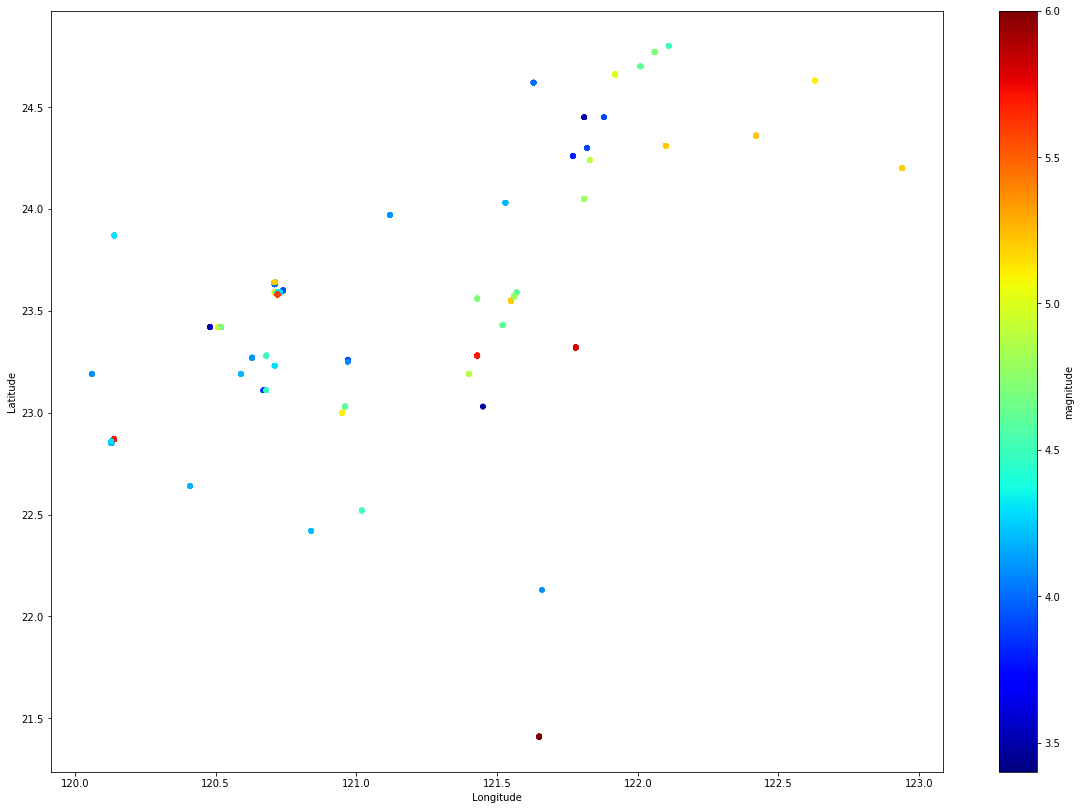

In [7]:
#earthquakes 2d scatter plots
fig, ax = plt.subplots()
earthquake_df.plot(kind="scatter", x="epicenter_longitude", y="epicenter_latitude",
    c="magnitude", cmap=plt.get_cmap("jet"),
    colorbar=True, figsize=(20,14), ax=ax
)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()

<IPython.core.display.Javascript object>


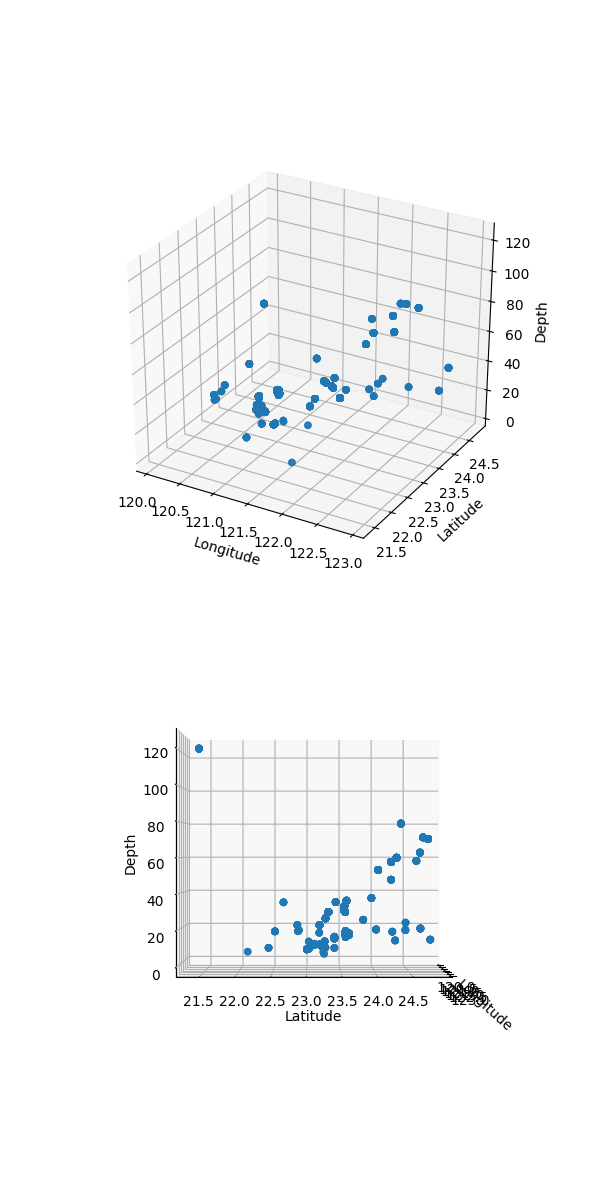

In [8]:
#earthquakes 3d scatter plots
%matplotlib notebook
fig = plt.figure(figsize=(6,12))

ax = fig.add_subplot(211, projection='3d')
ax.scatter3D(earthquake_df.epicenter_longitude, earthquake_df.epicenter_latitude, earthquake_df.depth, marker = 'o')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_zlabel("Depth")

ax2 = fig.add_subplot(212, projection='3d')
ax2.scatter3D(earthquake_df.epicenter_longitude, earthquake_df.epicenter_latitude, earthquake_df.depth, marker = 'o')
ax2.set_xlabel("Longitude")
ax2.set_ylabel("Latitude")
ax2.set_zlabel("Depth")
ax2.view_init(0, 0)
plt.show()

In [162]:
#earthquakes map plot
data = [ dict(
        type = 'scattergeo',
        locationmode = 'taiwan',
        lon = earthquake_df['epicenter_longitude'],
        lat = earthquake_df['epicenter_latitude'],
        text = ['Magnitude: ' + str(magnitude) for magnitude in earthquake_df['magnitude']],
        mode = 'markers',
        marker = dict(
            size = 4,
            opacity = 1,
            reversescale = False,
            autocolorscale = True,
            symbol = 'circle',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            cmin = earthquake_df['magnitude'].min(),
            color = earthquake_df['magnitude'],
            cmax = earthquake_df['magnitude'].max(),
            colorbar=dict(
                title="Magnitude"
            )
        ))]

layout = dict(
        title = 'Earthquakes in Taiwan',
        colorbar = True,
        geo = dict(
            scope='asia',
            projection=dict( type='mercator' ),
            showland = True,
            showcoastlines = True,
            showocean = True,
            showcountries = True,
            showsubunits = True,
            showframe = True,
            lonaxis = dict( range=[earthquake_df['epicenter_longitude'].min() - 1,earthquake_df['epicenter_longitude'].max() + 1]),
            lataxis = dict( range=[earthquake_df['epicenter_latitude'].min() - 1,earthquake_df['epicenter_latitude'].max() + 1])

        ),
        width = 800,
        height = 800
    )

fig = dict( data=data, layout=layout )
py.iplot(fig, validate=False, filename='taiwan_earthquakes')

In [164]:
#stations data frame
station_codes = earthquake_df.station_code.unique()
station_latitudes = []
station_longitudes = []
for code in station_codes:
    latitudes = earthquake_df.loc[lambda f: f.station_code == code].station_latitude
    if len(latitudes) > 0:
        station_latitudes += [latitudes.iloc[0]]
    longitudes = earthquake_df.loc[lambda f: f.station_code == code].station_longitude
    if len(longitudes) > 0:
        station_longitudes += [longitudes.iloc[0]]
station_df = pd.DataFrame(data={'code':station_codes, 'latitude':station_latitudes, 'longitude':station_longitudes})
len(station_df)

146

In [165]:
#stations map plot

data = [ dict(
        type = 'scattergeo',
        locationmode = 'taiwan',
        lon = station_df['longitude'],
        lat = station_df['latitude'],
        text = ['Station ID: ' + str(station_id) for station_id in station_df['code']],
        mode = 'markers',
        marker = dict(
            size = 6,
            opacity = 1,
            reversescale = False,
            symbol = 'dot',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            )
        ))]

layout = dict(
        title = 'Monitoring Stations in Taiwan',
        geo = dict(
            scope='asia',
            projection=dict( type='mercator' ),
            showland = True,
            showcoastlines = True,
            showocean = True,
            showcountries = True,
            showsubunits = True,
            showframe = True,
            lonaxis = dict( range=[station_df['longitude'].min() - 1,station_df['longitude'].max() + 1]),
            lataxis = dict( range=[station_df['latitude'].min() - 1,station_df['latitude'].max() + 1])

        ),
        width = 800,
        height = 800
    )

fig = dict( data=data, layout=layout )
py.iplot(fig, validate=False, filename='taiwan_monitoring_stations')

In [90]:
#tainan buildings dataframe
building_df = pd.read_pickle('data/building/tainan/Tainan0.pkl')

In [91]:
building_df.reset_index(drop=True, inplace=True)

In [92]:
english_columns = {'_id.$oid':'id',
                   '停車空間':'parking_space',
                   '原領執照字號':'license_number',
                   '地上層數':'floors_above',
                   '地下層數':'floors_basement',
                   '地下避難面積':'underground_refuge_area',
                   '地號':'place_code',
                   '執照類別':'license_category',
                   '基地面積':'base_area',
                   '實際開工日期':'date',
                   '建築物高度':'height',
                   '建築面積':'area',
                   '建造類別':'category',
                   '戶數':'number_households',
                   '承造人':'contractor',
                   '核發執照字號':'issuing_license_number',
                   '棟數':'number_buildings',
                   '構造別':'construct',
                   '樓層概要':'floor_summary',
                   '法定空地面積':'legal_empty_space',
                   '發照日期':'date_issued',
                   '監造人':'supervisor',
                   '竣工日期':'completion_date',
                   '總樓地板面積':'total_floor_area',
                   '設計人':'designer',
                   '變更設計次數':'change_design_times',
                   '起造人代表人':'representative',
                   '門牌':'address',
                   '雜項工作物':'miscellaneous',
                  }

In [93]:
building_df.rename(index=str, columns=english_columns, inplace=True)

In [166]:
print(len(building_df))
building_df.info()

392367
<class 'pandas.core.frame.DataFrame'>
Index: 392367 entries, 0 to 392366
Data columns (total 30 columns):
id                         392367 non-null object
qtime                      392367 non-null object
parking_space              392367 non-null object
license_number             392367 non-null object
floors_above               392367 non-null object
floors_basement            392367 non-null object
underground_refuge_area    392367 non-null object
place_code                 392367 non-null object
license_category           392367 non-null object
base_area                  392367 non-null object
date                       392367 non-null object
height                     392367 non-null object
area                       392367 non-null object
category                   392367 non-null object
number_households          392367 non-null object
contractor                 392367 non-null object
issuing_license_number     392367 non-null object
number_buildings           392367 non

In [95]:
building_df[0:2]

,id,qtime,parking_space,license_number,floors_above,floors_basement,underground_refuge_area,place_code,license_category,base_area,...,legal_empty_space,date_issued,supervisor,completion_date,total_floor_area,designer,change_design_times,representative,address,miscellaneous
0,5c0ac340e0f478b5cd6935f7,,法定0輛，獎勵0輛，自設0輛,,0層,0層,0㎡,[],使用執照,0㎡,...,0㎡,年月日,,年月日,0㎡,,00,,[],
1,5c0ac340e0f478b5cd6935f8,,法定0輛，獎勵0輛，自設0輛,,0層,0層,0㎡,[],使用執照,0㎡,...,0㎡,年月日,,年月日,0㎡,,00,,[],


In [96]:
count = 0
for index, row in building_df.iterrows():
    if len(row.address) == 0:
        count = count + 1
print("Percentage of data without address:", count/len(building_df))

0.2843970058644076


In [48]:
row_list = []

In [49]:
#filter data of shanhua district
for index, row in building_df.iterrows():
    if len(row.address) > 0 and "善化" in row.address[0]['行政區']:
        row_list.append(row)
print("Lenght of shanhua district data:", len(row_list))

5407


In [51]:
filtered_df = pd.DataFrame(row_list)

In [97]:
filtered_df[0:2]

,id,qtime,parking_space,license_number,floors_above,floors_basement,underground_refuge_area,place_code,license_category,base_area,...,legal_empty_space,date_issued,supervisor,completion_date,total_floor_area,designer,change_design_times,representative,address,miscellaneous
32331,5c0ac35de0f478b5cd69b441,07407,法定0輛，獎勵0輛，自設0輛,(074)南縣建字第00165號,3層,0層,0㎡,"[{'地號母號': '1208', '行政區': '臺南市善化區', '地號子號': '00...",使用執照,0㎡,...,0㎡,074年07月16日,,年月日,0㎡,,00,蘇金Ｏ,"[{'行政區': '臺南市善化區', '樓': '', '村里鄰': '', '戶號': '...",
32332,5c0ac35de0f478b5cd69b442,07407,法定0輛，獎勵0輛，自設0輛,(074)南縣建字第00127號,2層,0層,0㎡,"[{'地號母號': '0219', '行政區': '臺南市善化區', '地號子號': '00...",使用執照,0㎡,...,0㎡,074年07月16日,,年月日,0㎡,,00,胡清Ｏ,"[{'行政區': '臺南市善化區', '樓': '', '村里鄰': '', '戶號': '...",


In [55]:
filtered_df.to_pickle('data/building/tainan/shanhua.pkl') 

In [4]:
filtered_df = pd.read_pickle('data/building/tainan/shanhua.pkl')

In [98]:
#filtered_df[-10:][['id','date']]

In [171]:
filtered_df.address[:1][0]

[{'戶號': '', '村里鄰': '', '樓': '', '號': '177號', '行政區': '臺南市善化區', '路街段巷弄': '東勢寮'}]

In [59]:
shanhua_df = filtered_df[['id','license_number','floors_above','floors_basement','license_category','base_area',\
                         'date', 'height', 'area', 'category', 'number_households', 'issuing_license_number',\
                        'construct', 'floor_summary', 'date_issued', 'completion_date', 'total_floor_area',\
                        'change_design_times', 'representative', 'address']]

In [61]:
shanhua_df[0:2]
#a lot of data is missing in the older buildings

,id,license_number,floors_above,floors_basement,license_category,base_area,date,height,area,category,number_households,issuing_license_number,construct,floor_summary,date_issued,completion_date,total_floor_area,change_design_times,representative,address
32331,5c0ac35de0f478b5cd69b441,(074)南縣建字第00165號,3層,0層,使用執照,0㎡,年月日,10ｍ,0㎡,,1戶,(074)南縣使字第03348號,,[],074年07月16日,年月日,0㎡,00,蘇金Ｏ,"[{'行政區': '臺南市善化區', '樓': '', '村里鄰': '', '戶號': '..."
32332,5c0ac35de0f478b5cd69b442,(074)南縣建字第00127號,2層,0層,使用執照,0㎡,年月日,6.8ｍ,0㎡,,1戶,(074)南縣使字第03349號,,[],074年07月16日,年月日,0㎡,00,胡清Ｏ,"[{'行政區': '臺南市善化區', '樓': '', '村里鄰': '', '戶號': '..."


In [100]:
shanhua_df[-2:]

,id,license_number,floors_above,floors_basement,license_category,base_area,date,height,area,category,number_households,issuing_license_number,construct,floor_summary,date_issued,completion_date,total_floor_area,change_design_times,representative,address
392173,5c0ac4d7e0f478b5cd6f31e3,,1層,0層,建造執照,4379㎡,107年08月31日,10.5ｍ,86.4㎡,新建,1戶,(106)南工造字第04986號,鋼骨構造有牆,"[{'樓層別': '地上001層', '樓層用途': '農業資材室', '樓層高度': '9...",106年12月27日,年月日,86.4㎡,00,蘇漢Ｏ,"[{'行政區': '臺南市善化區', '樓': '', '村里鄰': '', '戶號': '..."
392243,5c0ac4d7e0f478b5cd6f3229,(106)南工造字第04334號,4層,0層,建造執照,142.53㎡,年月日,14.6ｍ,90.51㎡,新建,1戶,(106)南工造字第04334-01號,鋼筋混凝土構造,"[{'樓層別': '地上001層', '樓層用途': '騎樓', '樓層高度': '3.8ｍ...",107年10月04日,年月日,257.43㎡,01,陳冠Ｏ,"[{'行政區': '臺南市善化區', '樓': '', '村里鄰': '', '戶號': '..."


In [77]:
def get_english_license_category(license):
    if license == '使用執照':
        return 'use'
    if license == '建造執照':
        return 'construction'
    if license == '雜項執照':
        return 'miscellaneous'
    if license == '拆除執照':
        return 'demolition'
    return 'na'

def get_english_category(category):
    if license == '新建':
        return 'new'
    if license == '增建':
        return 'addition'
    return 'old'

In [82]:
#columns need to complete data
#license_category, category, 
#id = []
number_floors = []
number_basements = []
license_category = []
base_area = []
date = [] #use original date because completion date has too little values
height = []
building_area = []
category = []
number_households = []
construction_type = []
total_floor_area = []
number_design_changes = []
address = []

for index,row in shanhua_df.iterrows():
    #number of floors
    number_floors += [int(re.sub("[^0-9]", "", row.floors_above))]
    #number of basements
    number_basements += [int(re.sub("[^0-9]", "", row.floors_basement))]
    #license_category
    license_category += [get_english_license_category(row.license_category)]
    #base area
    base_area += [float(re.sub("[^0-9.]", "", row.base_area))]
    #date
    #todo find a way to represent it as a number
    date += [row.date]
    #height
    height += [float(re.sub("[^0-9.]", "", row.height))]
    #building_area
    building_area += [float(re.sub("[^0-9.]", "", row.area))]
    #category
    category += [get_english_category(row.category)]
    #number_households
    number_households += [int(re.sub("[^0-9]", "", row.number_households))]
    #construction_type
    c_type = 'unknown'
    if row.construct != '':
        c_type = row.construct
    construction_type += [c_type]
    #total floor area
    total_floor_area += [float(re.sub("[^0-9.]", "", row.total_floor_area))]
    #number design changes
    number_design_changes += [int(re.sub("[^0-9]", "", row.change_design_times))]
    #address (chinese for now, lattitude and longitude later)
    address += [row.address]

data_dictionary = {'number_floors':number_floors,
                   'number_basements':number_basements,
                   'license_category':license_category,
                   'base_area':base_area,
                   'date':date,
                   'height':height,
                   'building_area':building_area,
                   'category':category,
                   'number_households':number_households,
                   'construction_type':construction_type,
                   'total_floor_area' :total_floor_area,
                   'number_design_changes' :number_design_changes,
                   'address': address
                  }
buildings_english_df = pd.DataFrame(data_dictionary)
    

In [167]:
buildings_english_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5407 entries, 0 to 5406
Data columns (total 13 columns):
address                  5407 non-null object
base_area                5407 non-null float64
building_area            5407 non-null float64
category                 5407 non-null object
construction_type        5407 non-null object
date                     5407 non-null object
height                   5407 non-null float64
license_category         5407 non-null object
number_basements         5407 non-null int64
number_design_changes    5407 non-null int64
number_floors            5407 non-null int64
number_households        5407 non-null int64
total_floor_area         5407 non-null float64
dtypes: float64(4), int64(4), object(5)
memory usage: 549.2+ KB


In [88]:
len(buildings_english_df[buildings_english_df.construction_type == 'unknown'])

1338

In [86]:
buildings_english_df[0:2]

,address,base_area,building_area,category,construction_type,date,height,license_category,number_basements,number_design_changes,number_floors,number_households,total_floor_area
0,"[{'行政區': '臺南市善化區', '樓': '', '村里鄰': '', '戶號': '...",0.0,0.0,old,unknown,年月日,10.0,use,0,0,3,1,0.0
1,"[{'行政區': '臺南市善化區', '樓': '', '村里鄰': '', '戶號': '...",0.0,0.0,old,unknown,年月日,6.8,use,0,0,2,1,0.0


In [153]:
#binarization for categorical columns
buildings_english_binarized_df = buildings_english_df.copy()

category_binarizer = preprocessing.LabelBinarizer()
category_binarizer.fit(buildings_english_binarized_df.category)
buildings_english_binarized_df['category'] = category_binarizer.transform(buildings_english_binarized_df['category']).tolist()

construction_type_binarizer = preprocessing.LabelBinarizer()
construction_type_binarizer.fit(buildings_english_binarized_df.construction_type)
buildings_english_binarized_df['construction_type'] = construction_type_binarizer.transform(buildings_english_binarized_df['construction_type']).tolist()

license_category_binarizer = preprocessing.LabelBinarizer()
license_category_binarizer.fit(buildings_english_binarized_df.license_category)
buildings_english_binarized_df['license_category'] = license_category_binarizer.transform(buildings_english_binarized_df['license_category']).tolist()

In [154]:
buildings_english_binarized_df[0:2]

,address,base_area,building_area,category,construction_type,date,height,license_category,number_basements,number_design_changes,number_floors,number_households,total_floor_area
0,"[{'行政區': '臺南市善化區', '樓': '', '村里鄰': '', '戶號': '...",0.0,0.0,[0],"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",年月日,10.0,"[0, 0, 0, 1]",0,0,3,1,0.0
1,"[{'行政區': '臺南市善化區', '樓': '', '村里鄰': '', '戶號': '...",0.0,0.0,[0],"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",年月日,6.8,"[0, 0, 0, 1]",0,0,2,1,0.0


In [136]:
#building damages
yellow_damaged_buildings_df = pd.read_csv('data/building/tainan/opendata0206earthquakedangerbuildingmarkedyellow20160311.csv')
yellow_damaged_buildings_df['damage_level'] = 1

In [137]:
len(yellow_damaged_buildings_df)

329

In [141]:
yellow_damaged_buildings_df[-2:]

,流水號,行政區,地址,經度,緯度,初勘人員,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,damage_level
327,328,關廟區,臺南市關廟區旺萊路263號,120.337668,22.955858,楊王進、黃柏鈞,NaN,NaN,NaN,NaN,2
328,329,鹽水區,臺南市鹽水區孫厝里1鄰孫厝寮4-3號,120.226009,23.289025,周志安,NaN,NaN,NaN,NaN,2


In [144]:
red_damaged_buildings_df = pd.read_csv('data/building/tainan/opendata0206earthquakedangerbuildingmarkedred20160311.csv')
red_damaged_buildings_df['damage_level'] = 2

In [145]:
len(red_damaged_buildings_df)

250

In [146]:
red_damaged_buildings_df[-2:]

,流水號,行政區,地址,經度,緯度,初勘人員,damage_level
248,249,鹽水區,臺南市鹽水區康樂路2號,120.267411,23.317453,蔡炅霖、周志安,2
249,250,鹽水區,臺南市鹽水區南港里9鄰?頭港198-15號,120.249381,23.254387,周志安,2


In [194]:
english_columns2 = {'經度':'lon',
                   '緯度':'lat',
                  }
combined_df = pd.concat([red_damaged_buildings_df, yellow_damaged_buildings_df], axis=0, sort=False)
damage_df = combined_df.loc[:,('經度','緯度','damage_level')]
damage_df.rename(index=str, columns=english_columns2, inplace=True)
print(len(damage_df))
damage_df[:2]

579


,lon,lat,damage_level
0,120.230098,22.962252,2
1,120.234832,22.970249,2


In [195]:
damage_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 579 entries, 0 to 328
Data columns (total 3 columns):
lon             578 non-null float64
lat             578 non-null float64
damage_level    579 non-null int64
dtypes: float64(2), int64(1)
memory usage: 18.1+ KB


In [172]:
#liquefaction
liquefaction_df = pd.read_pickle('data/geographical/liquefaction.pkl')

In [174]:
liquefaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 5 columns):
coordinates    446 non-null object
type           446 non-null object
area           446 non-null object
classify       446 non-null int64
level          446 non-null object
dtypes: int64(1), object(4)
memory usage: 17.5+ KB


In [213]:
liquefaction_df[0:4]

,coordinates,type,area,classify,level
0,"[[[120.27871193, 22.89375869], [120.27871671, ...",Polygon,TaiNan,1,中潛勢
1,"[[[120.27871193, 22.89375869], [120.27870716, ...",Polygon,TaiNan,1,中潛勢
2,"[[[120.27185562, 22.90004867], [120.27186044, ...",Polygon,TaiNan,1,中潛勢
3,"[[[120.28842552, 22.90012372], [120.28745082, ...",Polygon,TaiNan,1,中潛勢


In [199]:
liquefaction_df.coordinates[0][0][2]

[120.27774206, 22.89285125]

In [214]:
def get_liquefaction(lon, lat, df):
    for index, row in df.iterrows():
        if len(row.coordinates) > 0 and len(row.coordinates[0]) > 0:
            for coordinate in row.coordinates[0]:
                if lon == coordinate[0] and lat == coordinate[1]:
                    return row.classify

In [215]:
print(get_liquefaction(120.27774206,22.89285125,liquefaction_df))

1
